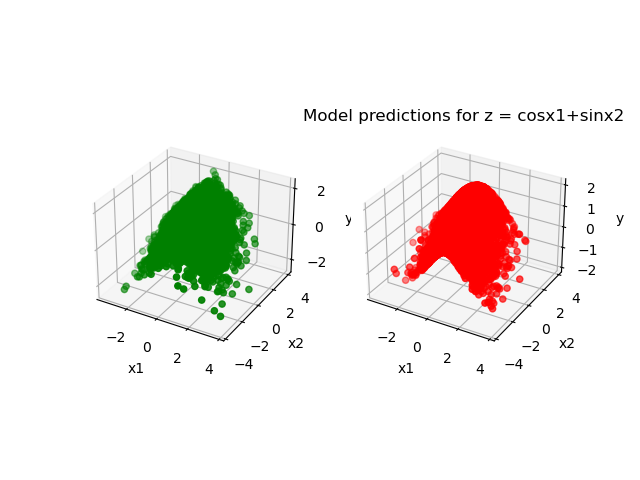

In [9]:
%matplotlib widget
import torch
import torch.nn as nn
import math
import numpy as np
import tensorflow as tf

# Define the model
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x


# Create an instance of the model
model = Net(input_size=2, hidden_size=10, output_size=1)
NUMBER = 5000
# Define the optimization algorithm and the loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Generate some synthetic data
x_train = torch.randn(NUMBER, 2)
#y_train = x_train[:, 0] ** 2 + x_train[:, 1] ** 2
x_train_np = x_train.numpy()
# print(x_train_np[:, 0])
# assert 0
y_train = torch.cos(x_train[:, 0]) + torch.sin(x_train[:, 1])
#y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
# Train the model
for epoch in range(NUMBER):
    # Forward pass
    y_pred = model(x_train).flatten()
    loss = loss_fn(y_pred, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()

    # Update the weights
    optimizer.step()

# do some test on the model
x_test = torch.randn(NUMBER, 2)
#x_test_np = x_test.numpy()
#y_test = x_test[:, 0] ** 2 + x_test[:, 1] ** 2
y_test = torch.cos(x_test[:, 0]) + torch.sin(x_test[:, 1])
#y_test= tf.convert_to_tensor(y_test, dtype=tf.float32)
y_pred = model(x_test)
# print the difference:
diff = []
index = 0

# ytest and ypred to list
ytest = y_test.tolist()
ypred = y_pred.tolist()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D Axes
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Make predictions using the model
y_pred = model(x_test).flatten()
# convert x_train and y_pred to list
x_test_tolist = np.array(x_test.tolist())
y_test_tolist = np.array(y_test.tolist())
y_pred = np.array(y_pred.tolist())
# Create a scatter plot
ax1.scatter(x_test_tolist[:, 0], x_test_tolist[:, 1], y_pred.squeeze(),c="g")
ax2.scatter(x_test_tolist[:, 0], x_test_tolist[:, 1], y_test.squeeze(),c="r")
# Add axis labels and a title
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
plt.title('Model predictions for z = cosx1+sinx2')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
plt.show()
